# CMSC 320 Term Project

## Data Preprocessing

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [93]:
df = pd.read_csv("btcusd_1-min_data.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")
df = df.set_index("Timestamp").sort_index()
df = df[~df.index.duplicated(keep="first")]

display(df.head())

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


Here we read the csv file, then convert the Timestamp column into Pandas datetime objects, so that we can later use time based operations cleaner. Then we sort the Timestamp column chronologically so we are able to see trends clearer. Finally we drop any duplicated timestamps so that only the first occurence shows, which resolves any skew in the data.

In [94]:
display(df.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

We run to see if there are missing values in the data. There appears to be none.

In [95]:
display(df[["Open", "High", "Low", "Close", "Volume"]].describe())

,Open,High,Low,Close,Volume
count,7.2688e+06,7.2688e+06,7.2688e+06,7.2688e+06,7.2688e+06
mean,2.0731e+04,2.0739e+04,2.0723e+04,2.0731e+04,5.1499e+00
std,2.9335e+04,2.9343e+04,2.9327e+04,2.9335e+04,2.2137e+01
min,3.8000e+00,3.8000e+00,3.8000e+00,3.8000e+00,0.0000e+00
25%,4.4033e+02,4.4055e+02,4.4008e+02,4.4033e+02,1.9045e-02
50%,7.1919e+03,7.1956e+03,7.1879e+03,7.1918e+03,4.4655e-01
75%,3.0220e+04,3.0228e+04,3.0213e+04,3.0221e+04,2.9104e+00
max,1.2620e+05,1.2627e+05,1.2616e+05,1.2620e+05,5.8539e+03


Gives overview of each column of the dataframe.

## Weekday vs Weekend Volume T-Test
We test whether average trading activity differs between weekdays and weekends by comparing the log-transformed minute volumes with a Welch two-sample t-test and a simple boxplot.

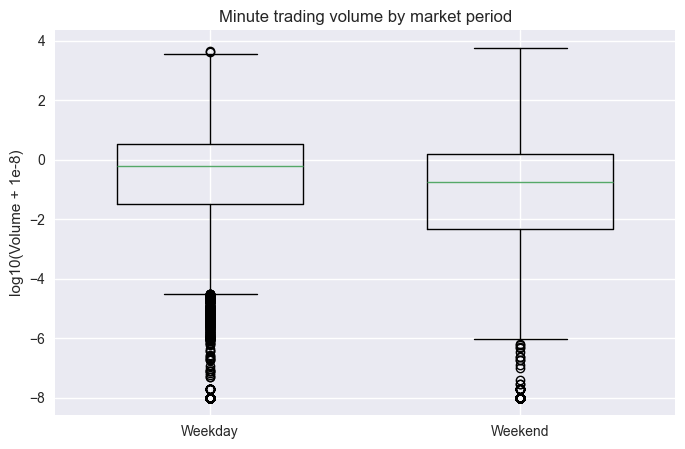

Weekday mean log volume:  -1.37866728249773 
Weekend mean log volume:  -2.0295251213328043 
T-value:  246.0820649448937 
P-Value:  0.0
1.5748195751115501 times more BTC per minute on weekdays.


In [96]:
weekday_mask = df.index.dayofweek < 5
weekend_mask = ~weekday_mask

weekday_vol = np.log10(df.loc[weekday_mask, "Volume"] + 1e-8)
weekend_vol = np.log10(df.loc[weekend_mask, "Volume"] + 1e-8)

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot([weekday_vol, weekend_vol], tick_labels=["Weekday", "Weekend"], widths=0.6)
ax.set_ylabel("log10(Volume + 1e-8)")
ax.set_title("Minute trading volume by market period")
plt.show()

t_stat, p_value = stats.ttest_ind(weekday_vol, weekend_vol, equal_var=False)
weekday_mean = weekday_vol.mean()
weekend_mean = weekend_vol.mean()
raw_ratio = df.loc[weekday_mask, "Volume"].mean() / df.loc[weekend_mask, "Volume"].mean()

print("Weekday mean log volume: ", weekday_mean,
      "\nWeekend mean log volume: ", weekend_mean,
      "\nT-value: ", t_stat,
      "\nP-Value: ", p_value) 
print(raw_ratio, "times more BTC per minute on weekdays.")

We compared minute bitcoin trading volumes between weekdays and weekends using a T-test on log10 because the raw minute volumes are very skewed. Weekdays show higher activity with mean log volume of -1.379 vs -2.030 which is around one and a half more raw volume per minute, with t=246 and p=0.0, so we reject the equal means. So we can conclude that the liquidity is higher on weekdays.